## Separate Temp and DIC by region
### Plot dT/dz and dDIC/dz for each on same node map

In [1]:
import sys
import numpy as np
import scipy as sp
import netCDF4 as nc4
import matplotlib.pyplot as plt
import xarray as xr
import dask.array as da
import pandas as pd
#from glob import glob
import glob

import numpy.linalg as linalg
import scipy.signal as signal
import scipy.ndimage as ndimage
import scipy.interpolate as interpolate

from netCDF4 import Dataset

from itertools import repeat

# import sys
# sys.path.insert(0, '/home/tsmith/scratch/eddyTracking/ecjoliver/')
# import params 

import re

from scipy.io.netcdf import netcdf_file as netcdf
import cmocean.cm as cmo
import warnings
import matplotlib.colors as colors
from cartopy import crs as ccrs, feature as cfeature

# import copy
# sys.path.insert(0, '/home/tsmith/scratch/SOMS_equal/')
# from SOMS_code import *
# from RegridderPLUS import *


In [2]:
%matplotlib inline

In [3]:
def find_ind(grid1d, coord):
        a=abs(grid1d-coord)
        return np.where(a==np.min(a))[0][0]

## Import Zones Anomaly

In [4]:
grid_zonesA = xr.open_mfdataset('/home/tsmith/scratch/Paper1_CODE_git/Data/SOMS_Temp_DIC_zones_Anticyclonic.nc'
                                     ,parallel=True)


In [5]:
grid_zonesC = xr.open_mfdataset('/home/tsmith/scratch/Paper1_CODE_git/Data/SOMS_Temp_DIC_zones_Cyclonic.nc'
                                     ,parallel=True)


In [6]:
depth = grid_zonesA['deptht']

In [7]:
Temp_anomA_SAZ = grid_zonesA['Temp_anom_SAZ']
Temp_anomA_PUZ = grid_zonesA['Temp_anom_PUZ']
Temp_anomA_MIZ = grid_zonesA['Temp_anom_MIZ']

In [8]:
DIC_anomA_SAZ = grid_zonesA['DIC_anom_SAZ']
DIC_anomA_PUZ = grid_zonesA['DIC_anom_PUZ']
DIC_anomA_MIZ = grid_zonesA['DIC_anom_MIZ']

In [9]:
Temp_anomC_SAZ = grid_zonesC['Temp_anom_SAZ']
Temp_anomC_PUZ = grid_zonesC['Temp_anom_PUZ']
Temp_anomC_MIZ = grid_zonesC['Temp_anom_MIZ']

DIC_anomC_SAZ = grid_zonesC['DIC_Cnom_SAZ']
DIC_anomC_PUZ = grid_zonesC['DIC_Cnom_PUZ']
DIC_anomC_MIZ = grid_zonesC['DIC_Cnom_MIZ']

## Plot vert profiles by Zone

In [10]:
from matplotlib import gridspec
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

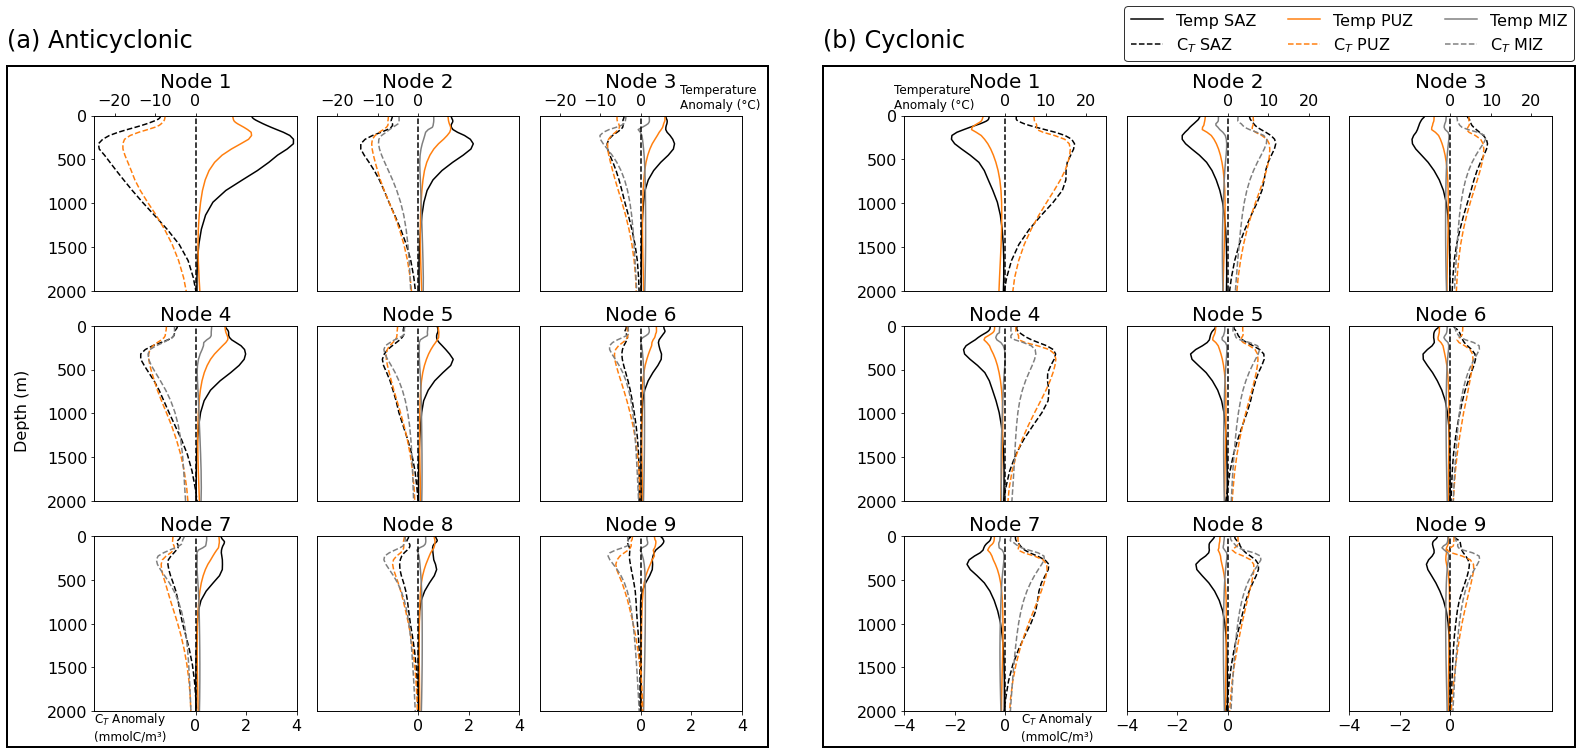

In [12]:
plt.rcParams.update({'font.size': 16})

fig = plt.figure(figsize=(22, 10.5),facecolor='w')
outer_grid = GridSpec(1, 2, width_ratios=[1, 1])

angle = np.linspace(0,2*np.pi,150)

# First grid
i = 0
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)

k = 0
row, col = divmod(k, 3)
ax = fig.add_subplot(inner_grid[row, col])

ax.plot(Temp_anomA_SAZ[k,:,47,47],depth,label='Temp SAZ',color='k')
ax.plot(Temp_anomA_PUZ[k,:,47,47],depth,label='Temp PUZ',color='tab:orange')
#ax.plot(TempA_MIZ[k,:,47,47],depth,label='Temp MIZ',color='tab:grey')

ax.set_ylim(2000,0)
ax.set_xlim(-4,4)
ax.axvline(x=0,color='k',linestyle='--')

ax1 = ax.twiny()
ax1.plot(DIC_anomA_SAZ[k,:,47,47]*1e6,depth,label='C$_T$SAZ',linestyle='--',color='k')
ax1.plot(DIC_anomA_PUZ[k,:,47,47]*1e6,depth,label='C$_T$PUZ',linestyle='--',color='tab:orange')
#     ax1.plot(DIC_A_MIZ[k,:,47,47]*1e6,depth,label='C$_T$MIZ',linestyle='--',color='tab:grey')

ax1.set_xlim(-25,25)

#ax.set_aspect('equal', adjustable='box')

ax.set_yticks([2000,1500,1000,500,0] if col == 0 else [])
ax.set_xticks([0,2,4] if row == 2 else [])
ax1.set_xticks([-20,-10,0]if row == 0 else [])
#can specify left or right justification but easier to just add spaces inbetween
#ax.set_title("Node %i   %.2f°C" % (k+1, SOMS_Temp_anomA[k,0,:,:].max(('y','x'))),fontsize=20)
ax.set_title("Node %i" %(k+1),fontsize=20)
fig.add_subplot(ax)

for k in range(1,9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    
    ax.plot(Temp_anomA_SAZ[k,:,47,47],depth,label='Temp SAZ',color='k')
    ax.plot(Temp_anomA_PUZ[k,:,47,47],depth,label='Temp PUZ',color='tab:orange')
    ax.plot(Temp_anomA_MIZ[k,:,47,47],depth,label='Temp MIZ',color='tab:grey')
    
    ax.set_ylim(2000,0)
    ax.set_xlim(-4,4)
    ax.axvline(x=0,color='k',linestyle='--')
    
    ax1 = ax.twiny()
    ax1.plot(DIC_anomA_SAZ[k,:,47,47]*1e6,depth,label='C$_T$SAZ',linestyle='--',color='k')
    ax1.plot(DIC_anomA_PUZ[k,:,47,47]*1e6,depth,label='C$_T$PUZ',linestyle='--',color='tab:orange')
    ax1.plot(DIC_anomA_MIZ[k,:,47,47]*1e6,depth,label='C$_T$MIZ',linestyle='--',color='tab:grey')
    
    ax1.set_xlim(-25,25)
    
    #ax.set_aspect('equal', adjustable='box')
    
    ax.set_yticks([2000,1500,1000,500,0] if col == 0 else [])
    ax.set_xticks([0,2,4] if row == 2 else [])
    ax1.set_xticks([-20,-10,0]if row == 0 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    #ax.set_title("Node %i   %.2f°C" % (k+1, SOMS_Temp_anomA[k,0,:,:].max(('y','x'))),fontsize=20)
    ax.set_title("Node %i" %(k+1),fontsize=20)
    
    fig.add_subplot(ax)




# Draw black box around the subplots in the first grid
rect = Rectangle((0.005, 0.005), 0.48, 0.9, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# Second grid
i = 1
inner_grid = GridSpecFromSubplotSpec(3, 3, subplot_spec=outer_grid[i], wspace=0.1, hspace=0.2)
k = 0
row, col = divmod(k, 3)
ax = fig.add_subplot(inner_grid[row, col])

ax.plot(Temp_anomC_SAZ[k,:,47,47],depth,label='Temp SAZ',color='k')
ax.plot(Temp_anomC_PUZ[k,:,47,47],depth,label='Temp PUZ',color='tab:orange')
#     ax.plot(TempC_MIZ[k,:,47,47],depth,label='Temp MIZ',color='tab:grey')

ax.set_ylim(2000,0)
ax.set_xlim(-4,4)
ax.axvline(x=0,color='k',linestyle='--')

ax1 = ax.twiny()
ax1.plot(DIC_anomC_SAZ[k,:,47,47]*1e6,depth,label='C$_T$ SAZ',linestyle='--',color='k')
ax1.plot(DIC_anomC_PUZ[k,:,47,47]*1e6,depth,label='$C_T$ PUZ',linestyle='--',color='tab:orange')
#     ax1.plot(DIC_C_MIZ[k,:,47,47]*1e6,depth,label='C$_T$MIZ',linestyle='--',color='tab:grey')

ax1.set_xlim(-25,25)

#ax.set_aspect('equal', adjustable='box')

ax.set_yticks([2000,1500,1000,500,0] if col == 0 else [])
ax.set_xticks([0,-2,-4] if row == 2 else [])
ax1.set_xticks([20,10,0]if row == 0 else [])
#can specify left or right justification but easier to just add spaces inbetween
#ax.set_title("Node %i   %.2f°C" % (k+1, SOMS_Temp_anomA[k,0,:,:].max(('y','x'))),fontsize=20)
ax.set_title("Node %i" %(k+1),fontsize=20)
fig.add_subplot(ax)

for k in range(1,9):
    row, col = divmod(k, 3)
    ax = fig.add_subplot(inner_grid[row, col])
    
    ax.plot(Temp_anomC_SAZ[k,:,47,47],depth,label='Temp SAZ',color='k')
    ax.plot(Temp_anomC_PUZ[k,:,47,47],depth,label='Temp PUZ',color='tab:orange')
    ax.plot(Temp_anomC_MIZ[k,:,47,47],depth,label='Temp MIZ',color='tab:grey')
    
    ax.set_ylim(2000,0)
    ax.set_xlim(-4,4)
    ax.axvline(x=0,color='k',linestyle='--')
    
    ax1 = ax.twiny()
    ax1.plot(DIC_anomC_SAZ[k,:,47,47]*1e6,depth,label='C$_T$ SAZ',linestyle='--',color='k')
    ax1.plot(DIC_anomC_PUZ[k,:,47,47]*1e6,depth,label='C$_T$ PUZ',linestyle='--',color='tab:orange')
    ax1.plot(DIC_anomC_MIZ[k,:,47,47]*1e6,depth,label='C$_T$ MIZ',linestyle='--',color='tab:grey')
    
    ax1.set_xlim(-25,25)
    
    #ax.set_aspect('equal', adjustable='box')
    
    ax.set_yticks([2000,1500,1000,500,0] if col == 0 else [])
    ax.set_xticks([0,-2,-4] if row == 2 else [])
    ax1.set_xticks([20,10,0]if row == 0 else [])
    #can specify left or right justification but easier to just add spaces inbetween
    #ax.set_title("Node %i   %.2f°C" % (k+1, SOMS_Temp_anomA[k,0,:,:].max(('y','x'))),fontsize=20)
    ax.set_title("Node %i" %(k+1),fontsize=20)
    
    
    fig.add_subplot(ax)

# Draw black box around the subplots in the second grid
rect = Rectangle((0.52, 0.005), 0.475, 0.9, fill=False, lw=2, edgecolor='black', transform=fig.transFigure)
fig.add_artist(rect)

# # Add colorbar
# cbar_ax = fig.add_subplot(outer_grid[2])
# cbar = plt.colorbar(mesh, cax=cbar_ax, orientation='vertical',
#                     #label='Temp anomaly °C',
#                     shrink=1,aspect=20)
# cbar.set_ticks([0,1,2,3,4,5])
# cbar.ax.tick_params(labelsize=16)
# cbar_ax.set_title('Node\nPercentage\n(%)',pad=10,fontsize=18)
# #cbar.set_label('Temp anomaly °C', rotation=90, labelpad=10, fontsize=16)

# Adjust layout
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.subplots_adjust(left=0.06)
plt.subplots_adjust(right=0.98)
plt.subplots_adjust(top=0.84)
# plt.subplots_adjust(bottom=0.1)

# #plt.subplots_adjust(wspace=0.25)
# #plt.subplots_adjust(right=0.85)
# # plt.subplots_adjust(top=0.85)
#plt.subplots_adjust(left=0.1)

#cbar_ax.set_position([0.5,0.5,0.5,0.9])

#plt.subplots_adjust(right=0.85)

# Add labels
fig.text(0.005, 0.93, '(a) Anticyclonic', fontsize=24, fontweight='normal')
fig.text(0.52, 0.93, '(b) Cyclonic', fontsize=24, fontweight='normal')
fig.text(0.01,0.4, "Depth (m)",rotation='vertical')
fig.text(0.43,0.85, "Temperature\nAnomaly (°C)",fontsize=12)
fig.text(0.06,0.015, "C$_T$ Anomaly\n(mmolC/m\u00B3)",fontsize=12)

fig.text(0.565,0.85, "Temperature\nAnomaly (°C)",fontsize=12)
fig.text(0.645,0.015, "C$_T$ Anomaly\n(mmolC/m\u00B3)",fontsize=12)


# fig.text(0.215,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)
# fig.text(0.67,0.03, 'Longitude (°)',rotation='horizontal',fontsize=16)

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
handles += handles1
labels += labels1
#reorder
handles_new = [handles[0],handles[3],handles[1],handles[4],handles[2],handles[5]]
labels_new = [labels[0],labels[3],labels[1],labels[4],labels[2],labels[5]]

fig.legend(handles_new, labels_new,loc='upper right', bbox_to_anchor=(0.999, 0.995),ncol=3,fontsize=16,edgecolor='k')

plt.savefig('/home/tsmith/scratch/images/Paper1_Rev/SOMS_Temp_DIC_vert_zones_FigureS10R.png', dpi=500)
